In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import r2_score, mean_squared_error
import time


In [ ]:
df = pd.read_csv('/content/train.csv')
df.head(15)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
5,6,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600
6,7,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800
7,8,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520
8,9,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040
9,10,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000


In [ ]:
df.shape

(9800, 18)

In [ ]:
df.info

<bound method DataFrame.info of       Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
1          2  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
2          3  CA-2017-138688  12/06/2017  16/06/2017    Second Class   
3          4  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
4          5  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
...      ...             ...         ...         ...             ...   
9795    9796  CA-2017-125920  21/05/2017  28/05/2017  Standard Class   
9796    9797  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9797    9798  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9798    9799  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9799    9800  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United States        Henderson   
1       CG-12520       Claire Gute   Consumer  United States        Henderson   
2       DV-13045   Darrin Van Huff  Corporate  United States      Los Angeles   
3       SO-20335    Sean O'Donnell   Consumer  United States  Fort Lauderdale   
4       SO-20335    Sean O'Donnell   Consumer  United States  Fort Lauderdale   
...          ...               ...        ...            ...              ...   
9795    SH-19975     Sally Hughsby  Corporate  United States          Chicago   
9796    CS-12490  Cindy Schnelling  Corporate  United States           Toledo   
9797    CS-12490  Cindy Schnelling  Corporate  United States           Toledo   
9798    CS-12490  Cindy Schnelling  Corporate  United States           Toledo   
9799    CS-12490  Cindy Schnelling  Corporate  United States           Toledo   

           State  Postal Code   Region       Product ID         Category  \
0       Kentucky      42420.0    South  FUR-BO-10001798        Furniture   
1       Kentucky      42420.0    South  FUR-CH-10000454        Furniture   
2     California      90036.0     West  OFF-LA-10000240  Office Supplies   
3        Florida      33311.0    South  FUR-TA-10000577        Furniture   
4        Florida      33311.0    South  OFF-ST-10000760  Office Supplies   
...          ...          ...      ...              ...              ...   
9795    Illinois      60610.0  Central  OFF-BI-10003429  Office Supplies   
9796        Ohio      43615.0     East  OFF-AR-10001374  Office Supplies   
9797        Ohio      43615.0     East  TEC-PH-10004977       Technology   
9798        Ohio      43615.0     East  TEC-PH-10000912       Technology   
9799        Ohio      43615.0     East  TEC-AC-10000487       Technology   

     Sub-Category                                       Product Name     Sales  
0       Bookcases                  Bush Somerset Collection Bookcase  261.9600  
1          Chairs  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400  
2          Labels  Self-Adhesive Address Labels for Typewriters b...   14.6200  
3          Tables      Bretford CR4500 Series Slim Rectangular Table  957.5775  
4         Storage                     Eldon Fold 'N Roll Cart System   22.3680  
...           ...                                                ...       ...  
9795      Binders  Cardinal HOLDit! Binder Insert Strips,Extra St...    3.7980  
9796          Art           BIC Brite Liner Highlighters, Chisel Tip   10.3680  
9797       Phones                                        GE 30524EE4  235.1880  
9798       Phones           Anker 24W Portable Micro USB Car Charger   26.3760  
9799  Accessories                SanDisk Cruzer 4 GB USB Flash Drive   10.3840  

[9800 rows x 18 columns]>

In [ ]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [ ]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [ ]:
df.loc[df["Postal Code"].isna(),['Country','City','State','Postal Code']]

,Country,City,State,Postal Code
2234,United States,Burlington,Vermont,NaN
5274,United States,Burlington,Vermont,NaN
8798,United States,Burlington,Vermont,NaN
9146,United States,Burlington,Vermont,NaN
9147,United States,Burlington,Vermont,NaN
9148,United States,Burlington,Vermont,NaN
9386,United States,Burlington,Vermont,NaN
9387,United States,Burlington,Vermont,NaN
9388,United States,Burlington,Vermont,NaN
9389,United States,Burlington,Vermont,NaN


In [ ]:
df.loc[(df['City']=='Burlington') & (df['State']=='Vermont'),['Country','Postal Code']]


,Country,Postal Code
2234,United States,NaN
5274,United States,NaN
8798,United States,NaN
9146,United States,NaN
9147,United States,NaN
9148,United States,NaN
9386,United States,NaN
9387,United States,NaN
9388,United States,NaN
9389,United States,NaN


In [ ]:
final=df.copy()
final["Postal Code"]=final["Postal Code"].fillna(5041)
final.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [ ]:
final_1 = df.copy()
final_1.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [ ]:
final_1 = final_1.dropna(subset=["Postal Code"])
final_1.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [ ]:
print(final.dtypes)


Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object


In [ ]:
# Convert multiple columns to different data types
final['Postal Code'] = final['Postal Code'].astype(int)
print(final.dtypes)

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object


In [ ]:
final.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9800.000000,9800.000000
mean,4900.500000,55216.939184,230.769059
std,2829.160653,32067.380605,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,57551.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [ ]:
final.Sales.describe()

count     9800.000000
mean       230.769059
std        626.651875
min          0.444000
25%         17.248000
50%         54.490000
75%        210.605000
max      22638.480000
Name: Sales, dtype: float64

In [ ]:
numeric_columns = ['Sales', 'Postal Code']

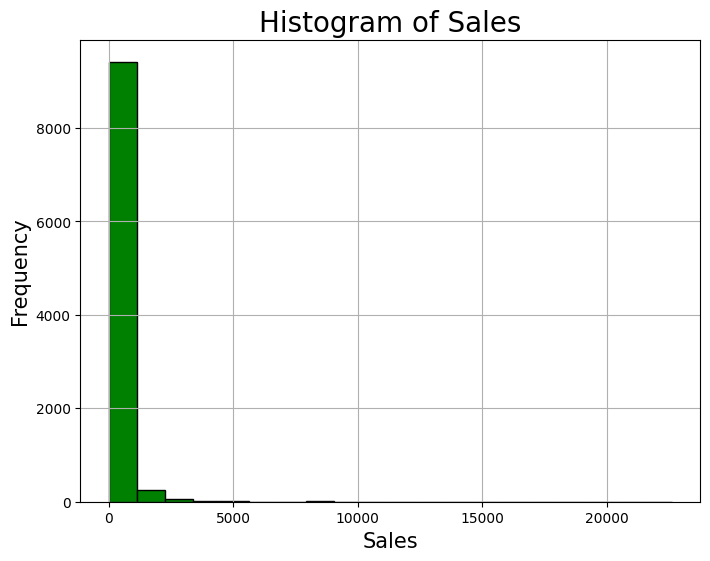

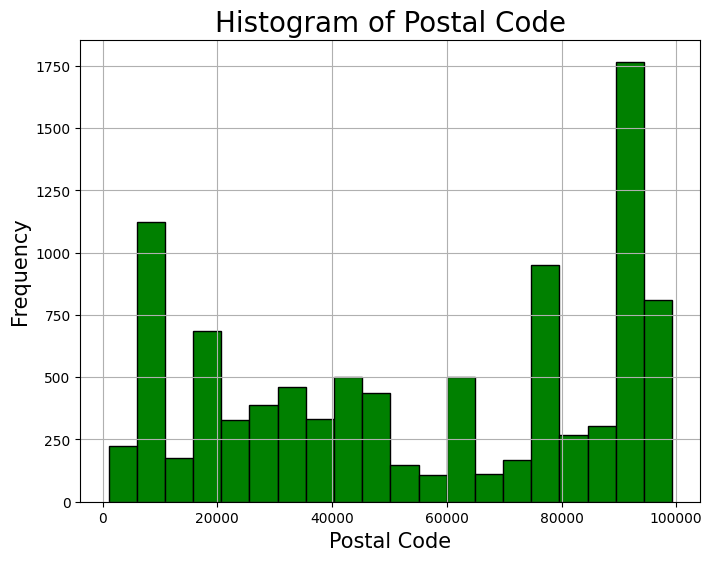

In [ ]:
# Create histograms for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(final_1[column], bins=20, color='green', edgecolor='black')
    plt.title(f'Histogram of {column}', fontsize=20)
    plt.xlabel(column, fontsize=15)
    plt.ylabel('Frequency', fontsize=15)
    plt.grid(True)
    plt.show()

<ipython-input-21-f9090ca026d2>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  final_1['Ship Date'] = pd.to_datetime(final_1['Ship Date'])


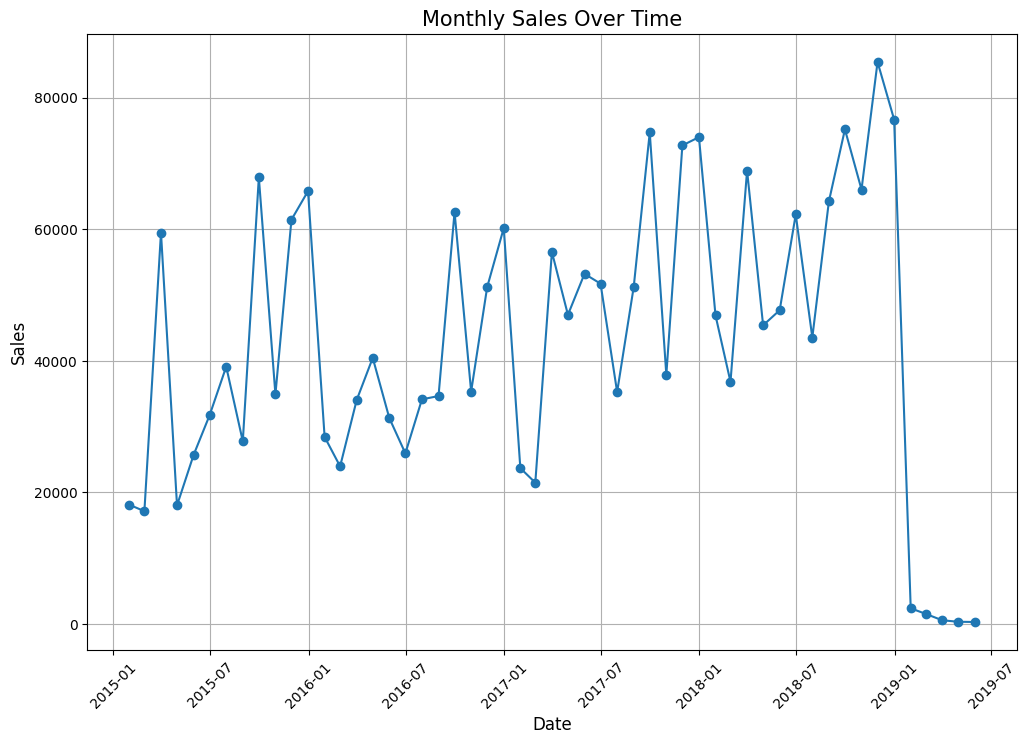

In [ ]:
import matplotlib.pyplot as plt

# Convert 'Ship Date' to datetime if it's not already in datetime format
final_1['Ship Date'] = pd.to_datetime(final_1['Ship Date'])

# Set 'Ship Date' as the index for the DataFrame (assuming it's not already the index)
final_1.set_index('Ship Date', inplace=True)

# Resample the data by month and calculate the sum of sales for each month
monthly_sales = final_1['Sales'].resample('M').sum()

# Create a time series plot
plt.figure(figsize=(12, 8))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')
plt.title('Monthly Sales Over Time', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.grid(True)
plt.show()


<ipython-input-23-02159b20e795>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Order Date'] = pd.to_datetime(df['Order Date'])  # Convert to datetime if not already


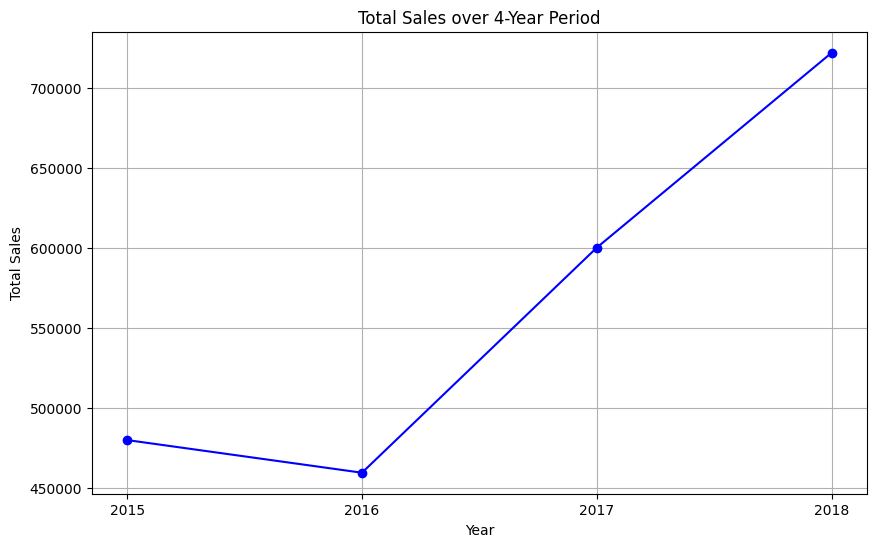

In [ ]:
# Extract the year from the 'Order Date' column
df['Order Date'] = pd.to_datetime(df['Order Date'])  # Convert to datetime if not already
df['Year'] = df['Order Date'].dt.year

# Group by year and sum the sales for each year
sales_in_4_years = df.groupby('Year')['Sales'].sum()

# Plotting the time series data by year
plt.figure(figsize=(10, 6))
plt.plot(sales_in_4_years.index, sales_in_4_years.values, marker='o', linestyle='-', color='b')
plt.title('Total Sales over 4-Year Period')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(sales_in_4_years.index)
plt.grid(True)
plt.show()

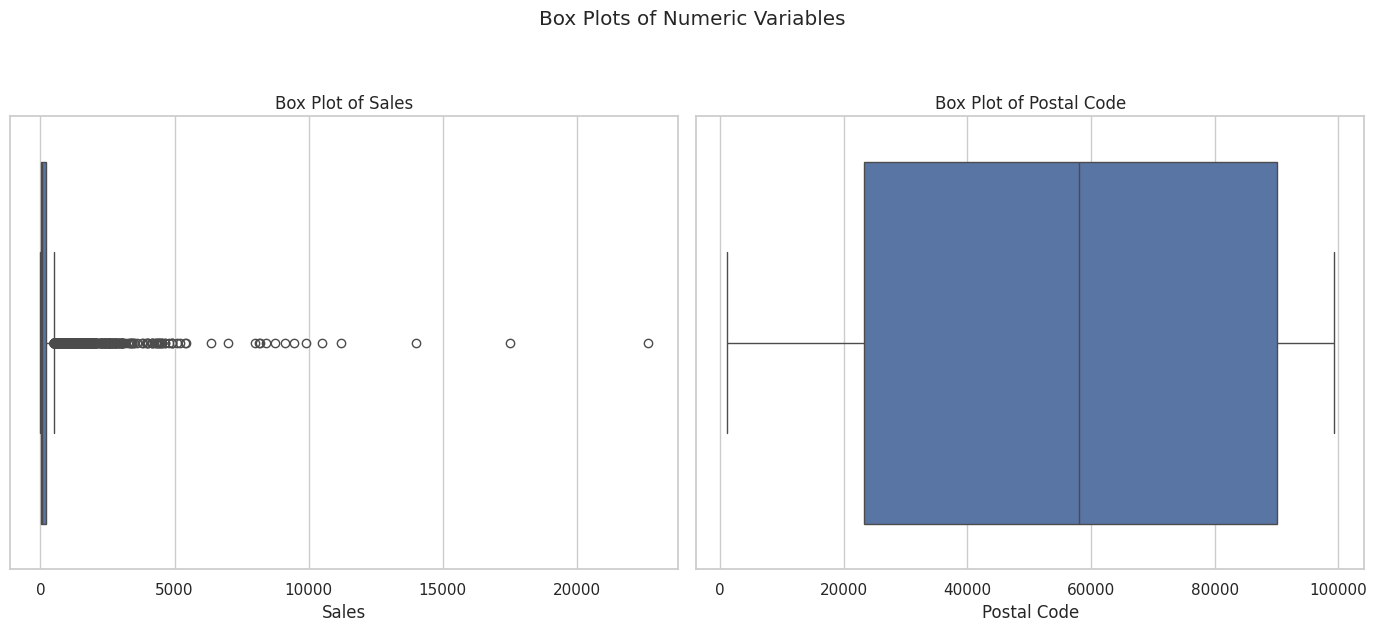

In [ ]:
# Select numeric columns for box plots
numeric_columns = ['Sales', 'Postal Code']  # Add other numeric columns as needed

# Create box plots using seaborn with improved layout
plt.figure(figsize=(14, 6))
sns.set(style="whitegrid")

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(1, len(numeric_columns), i)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')

plt.suptitle('Box Plots of Numeric Variables', y=1.05)
plt.tight_layout()
plt.show()


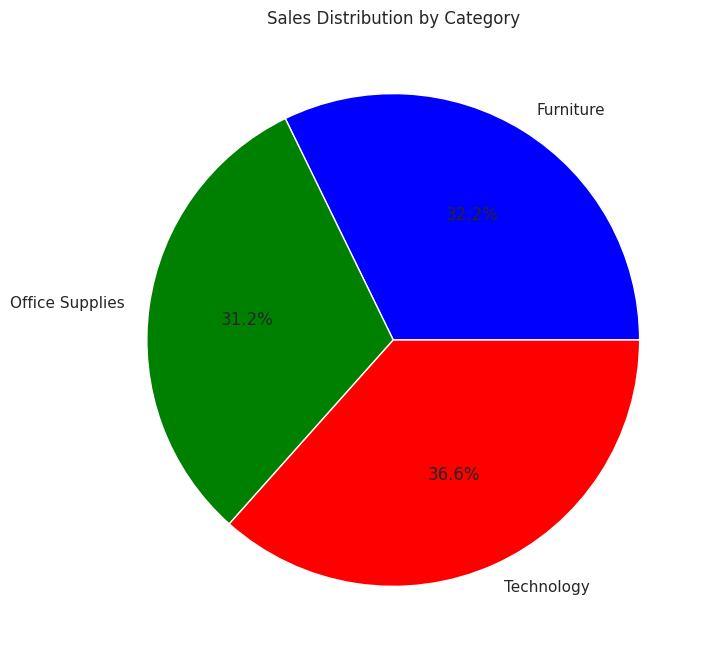

In [ ]:
# Group by 'Category' and sum the sales
category_sales = df.groupby('Category')['Sales'].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', colors=['blue', 'green', 'red'])
plt.title('Sales Distribution by Category')
plt.show()

In [ ]:
montly_sales = df.groupby(df['Order Date'].dt.month)['Sales'].sum()
montly_sales

Order Date
1     155990.9154
2     131153.2594
3     212256.1344
4     142984.2481
5     166000.7467
6     142034.7713
7     159472.5865
8     207601.7939
9     245155.0671
10    183851.9562
11    268768.7885
12    246266.5152
Name: Sales, dtype: float64

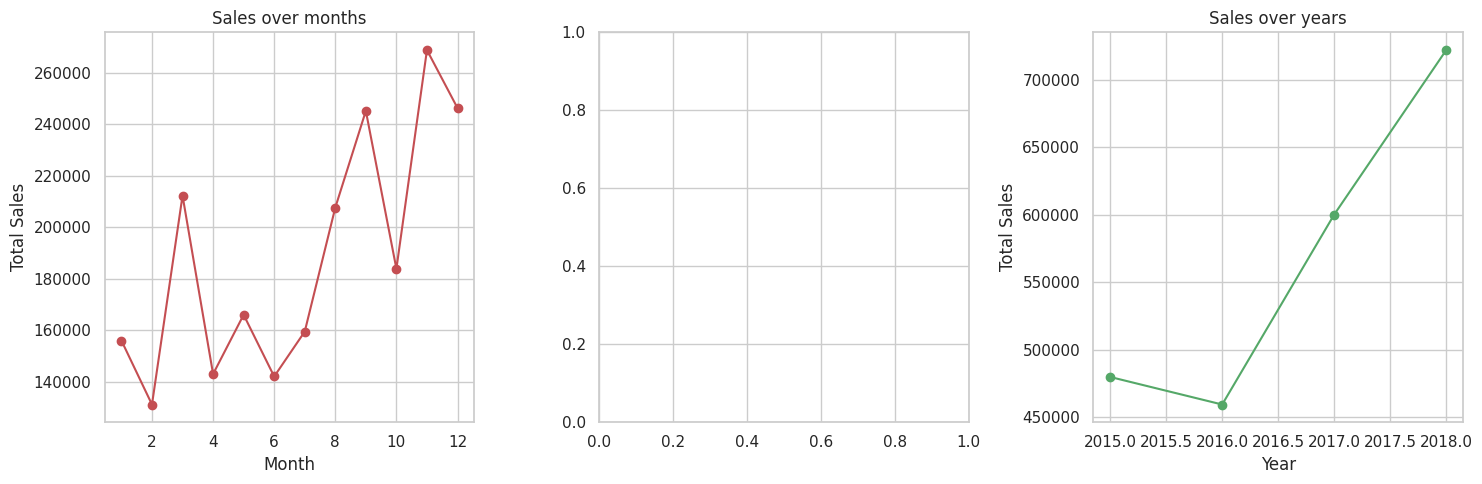

In [ ]:
# Extract different time periods (Month, Quarter, Year)
df['Month'] = df['Order Date'].dt.month

# Group by different time periods and sum the sales for each period
sales_by_month = df.groupby('Month')['Sales'].sum()
sales_by_year = df.groupby('Year')['Sales'].sum()

# Plotting line charts
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Sales over months
axs[0].plot(sales_by_month.index, sales_by_month.values, marker='o', linestyle='-', color='r')
axs[0].set_title('Sales over months')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Total Sales')

# Sales over years
axs[2].plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-', color='g')
axs[2].set_title('Sales over years')
axs[2].set_xlabel('Year')
axs[2].set_ylabel('Total Sales')

plt.tight_layout()
plt.show()

<ipython-input-33-360eab9a0291>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Sales', data=region_sales, palette='viridis')


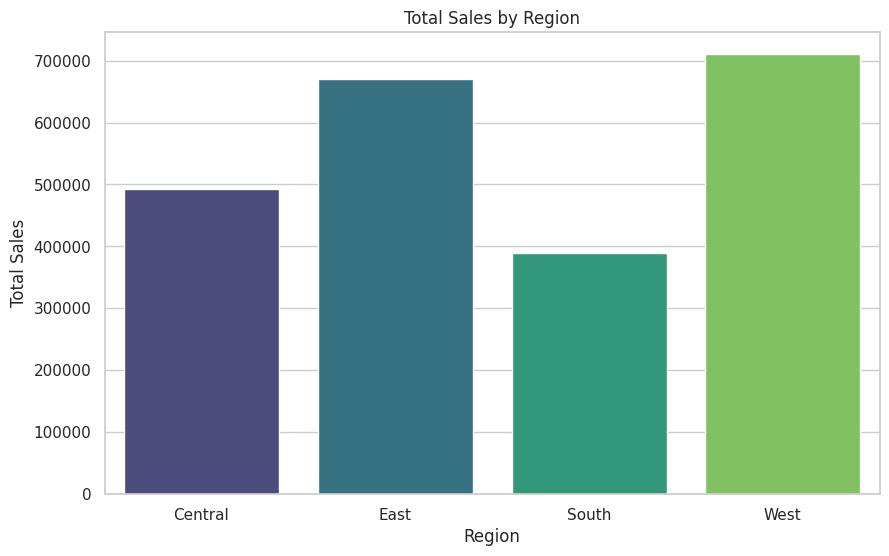

In [ ]:
# Group data by Region and sum the sales for each region
region_sales = df.groupby('Region')['Sales'].sum().reset_index()

# Plot a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Sales', data=region_sales, palette='viridis')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()